Consider the following simple linear model of the labor market:

\begin{cases}
L_d &= ad - bd(w + T) \\
L_s &= -az + bz*w \\
L_d &= L_s
\end{cases}

where $ad$, $bd$, $az$, and $bz$ $\in \mathbb{R}^+$ and $w$ is the wage per hour. $T$ is a tax on labor paid by the firm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

########################
#set parameters
########################
ad= 20 #10
bd=0.5 #.8
az= 10 #-5.
bz=0.4 #.4
tax= 3 #0.2

In [2]:
if ad < az: #if there is not sufficient conditions for a market equilibrium
    raise ValueError('No Market. Insufficient Demand.')

(a) Put the linear model in matrix form and solve the linear model in Python for the equilibrium wage and the equilibrium labor.

(Put the model in linear form $AX = B$ by carefully defining the matrix $A$ and the vector $B$)

In [3]:
A=np.zeros((2,2))
A   


A[0,0]=1
A[0,1]=bd
A[1,0]=1
A[1,1]=-bz
A #the first matrix on the left, where we have isolated the variables related to the labor and wages

A=np.asmatrix(A)
A_inv=np.linalg.inv(A)
A_inv


matrix([[ 0.44444444,  0.55555556],
        [ 1.11111111, -1.11111111]])

In [4]:
def B_tax(tau):
    BB=np.zeros((2,1))
    BB[0,0]=ad-bd*tau
    BB[1,0]=-az
    return BB #in this way I obtain a dynamic array that change the result based to the change on the tax 

In [5]:
def Mkt_eq(tau):
    X_star=A_inv*B_tax(tau) 
    return X_star #the final solution to the problem of equilibrium

eq_tax=Mkt_eq(tax)
l_tax=Mkt_eq(tax)[0] #Labor
w_tax=Mkt_eq(tax)[1] #wage

eq_no_tax=Mkt_eq(tau=0)  #the final solution to the problem of equilibrium without taxes
l_notax=Mkt_eq(0)[0]
w_notax=Mkt_eq(0)[1]

In [6]:
eq_tax

matrix([[ 2.66666667],
        [31.66666667]])

In [7]:
eq_no_tax

matrix([[ 3.33333333],
        [33.33333333]])

(b) Suppose that the tax value assigned in point a) increases by 10 percent, so that $T_1 = 1.1 \cdot T_0$. 

Solve the model with the new tax and obtain the new labor and wage in equilibrium. Define the elasticity of labor supply as $\epsilon_{L,w}(T) = {\left|\left|\frac{\Delta L/L}{\Delta w/w}\right|\right|}$, where $\Delta L$ and $\Delta w$ are the changes in wages associated with the change in tax. Obtain numerically the value of the elasticity of labor supply.


In [8]:
tax1=tax*1.1


def B_tax1(tau):
    BB=np.zeros((2,1))
    BB[0,0]=ad-bd*tau
    BB[1,0]=-az
    return BB 

def Mkt_eq1(tau):
    X_star=A_inv*B_tax1(tau) 
    return X_star #the final solution to the problem of equilibrium with taxes *1.1

eq_tax1=Mkt_eq1(tax1)
l_tax1=Mkt_eq1(tax1)[0] #Labor
w_tax1=Mkt_eq1(tax1)[1] #wage

eq_no_tax1=Mkt_eq1(tau=0)  #the final solution to the problem of equilibrium without taxes
l_notax1=Mkt_eq1(0)[0]
w_notax1=Mkt_eq1(0)[1]

ϵ = abs((l_tax-l_tax1)/l_tax/(w_tax-w_tax1)/w_tax)

In [9]:
eq_tax1

matrix([[ 2.6],
        [31.5]])

In [10]:
eq_no_tax1 #only for control

matrix([[ 3.33333333],
        [33.33333333]])

In [11]:
print("the elasticity of the Labor Suply is : ",round(float(ϵ),8)*100, "%") #elasticity, rounded and in percentile

the elasticity of the Labor Suply is :  0.473684 %



(c) Genera una sequenza lineare per il parametro $bz$ ottenendo 10 valori di tali
parametri. In particolare, assumi che il valore più basso della sequenza sia il
valore originale nel punto a) $\hat{b}_z$ mentre il valore massimo sia $2\hat{b}z$.
Ottieni i 10 valori dell'elasticità associati alla sequenza lineare, in modo che $\epsilon_{L,w}(T)(\hat{b}_z)$

In [12]:
bz_dynamic =np.linspace(bz, 2*bz, 10) #min value bz, max value 2bz, interval of 10 values

bz_dynamic

array([0.4       , 0.44444444, 0.48888889, 0.53333333, 0.57777778,
       0.62222222, 0.66666667, 0.71111111, 0.75555556, 0.8       ])

In [38]:
ϵ_dynamic = []

for i in bz_dynamic:
    A[0,0]=1
    A[0,1]=bd
    A[1,0]=1
    A[1,1]=-i
    A 

    A=np.asmatrix(A)
    A_inv=np.linalg.inv(A)

    eq_tax=Mkt_eq(tax)
    l_tax=Mkt_eq(tax)[0] #Labor
    w_tax=Mkt_eq(tax)[1] #wage

    eq_no_tax=Mkt_eq(tau=0)  #no tax
    l_notax=Mkt_eq(0)[0]
    w_notax=Mkt_eq(0)[1]
    
    eq_tax1=Mkt_eq1(tax1) #remember that we are using tax *1.1
    l_tax1=Mkt_eq1(tax1)[0] #dynamic Labor
    w_tax1=Mkt_eq1(tax1)[1] #dynamic wages

    eq_no_tax1=Mkt_eq1(tau=0) 
    l_notax1=Mkt_eq1(0)[0]
    w_notax1=Mkt_eq1(0)[1]
    
    ϵ = abs(((l_tax-l_tax1)/l_tax)/((w_tax-w_tax1)/w_tax))
    
    ϵ_dynamic.append(float(ϵ))
    
    print(ϵ)
    
    

[[4.75]]
[[3.93103448]]
[[3.44505495]]
[[3.12328767]]
[[2.89453125]]
[[2.72354949]]
[[2.59090909]]
[[2.48501362]]
[[2.39851485]]
[[2.32653061]]


In [39]:
ϵ_dynamic

[4.7500000000000515,
 3.931034482758391,
 3.4450549450549484,
 3.123287671232916,
 2.894531250000035,
 2.723549488054613,
 2.590909090909127,
 2.485013623978198,
 2.3985148514851518,
 2.3265306122449334]

In [40]:
import matplotlib.pyplot as plt

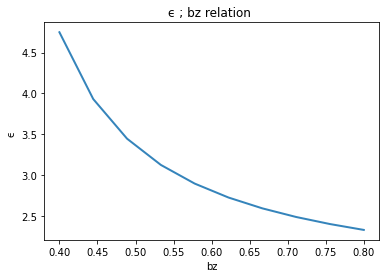

In [41]:
fig, ax =plt.subplots()

plt.plot(bz_dynamic, ϵ_dynamic,alpha = 0.9,linewidth=2)

plt.title("ϵ ; bz relation ")
plt.xlabel("bz")
plt.ylabel("ϵ ")

plt.show()


2) Consider a general continuous demand function of a market for cookies, where $p$ is the price, $Q_d$ is the quantity demanded, and $y$ is income:
$$Q_d = D(p, y, \Phi^d)$$

s.t. $\frac{\partial D}{\partial p} < 0$, and $\frac{\partial D}{\partial y} > 0$. $\Phi^d$ is a set of exogenous parameters. Consider the supply function for the market considered, where $Q^s$ is an upward continuous function with respect to $p$:
$$Q_s = S(p, \Phi^s)$$
To begin with, choose an analytic expression of a (non-linear) demand and supply function that satisfy the properties specified above. Specify the parameters of the sets $\Phi^d$ and $\Phi^s$.

(a) Ensure, analytically, that an equilibrium exist in the market with the function
chosen

The analytic expression for the demand function in the market in this exercise is :

$ Q^d = \frac{\alpha Y}{p} $


While the analytic expression for the supply curve is:

$ Q^s = +\gamma p^2  $

\begin{cases}
Q_d &= \frac {\alpha*Y}{p}\\
Q_s &= \gamma*p^2 \\
Q_d &= Q_s
\end{cases}




In [17]:
import numpy as np
import matplotlib.pyplot as plt

α = 0.4
Y= 100
γ= 0.5

def demand(α,Y,p): #Q_d
    return (α*Y)/p

def deriv_demand(α,Y,p):
    return -(α*Y)/p**2

def supply(γ,p): #Q_s
    return γ*p**2

def deriv_supply(γ,p):
    return 2*γ*p

def mkt_f(p):
    return supply(γ,p)-demand(α,Y,p)

def fprime(p):
    return deriv_supply(p)-demand_supply(p)

def inv_demand(q,Y,α):
    return (α*Y)/q

def inv_supply(q,γ):
    return (q/γ)**0.5

In [18]:
y_axis_demand=[]
for i in np.linspace(0.1, 5, 800):
    result= demand(α,Y,i)
    y_axis_demand.append(result)


In [19]:
y_axis_supply=[]
for i in np.linspace(0.1, 5, 800):
    result= supply(γ,i)
    y_axis_supply.append(result)

In [20]:
x_axis = np.linspace(3, 5, 800)
y_axis_demand = demand(α, Y, x_axis)
y_axis_supply = supply(γ, x_axis)

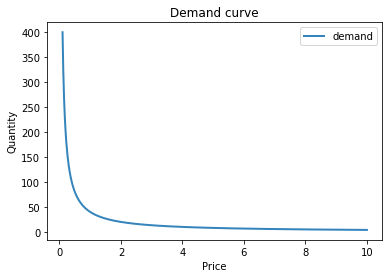

In [21]:
x_axis_demand = np.linspace(0.1, 10, 800)

y_axis_demand1=[]
for i in np.linspace(0.1, 10, 800):
    result= demand(α,Y,i)
    y_axis_demand1.append(result)

fig, ax = plt.subplots()

plt.plot(x_axis_demand, y_axis_demand1, label="demand", alpha=0.9, linewidth=2)

#fig, ax = plt.subplots()

plt.title("Demand curve")
plt.xlabel("Price")
plt.ylabel("Quantity")

plt.legend()

plt.show()

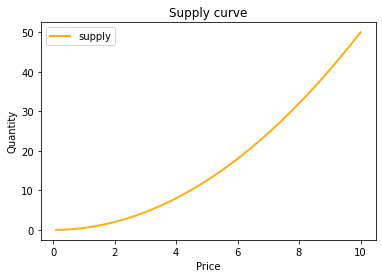

In [22]:
x_axis_supply = np.linspace(0.1, 10, 800)

y_axis_supply1=[]
for i in np.linspace(0.1, 10, 800):
    result= supply(γ,i)
    y_axis_supply1.append(result)

fig, ax = plt.subplots()

plt.plot(x_axis_supply, y_axis_supply1, label="supply", color="orange", alpha=0.9, linewidth=2)

plt.title("Supply curve")
plt.xlabel("Price")
plt.ylabel("Quantity")

plt.legend()

plt.show()

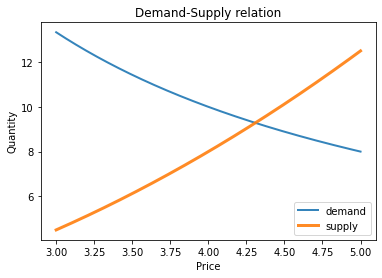

In [23]:

plt.plot(x_axis, y_axis_demand, label="demand", alpha=0.9, linewidth=2)
plt.plot(x_axis, y_axis_supply, label="supply", alpha=0.9, linewidth=3)

plt.title("Demand-Supply relation")
plt.xlabel("Price")
plt.ylabel("Quantity")

plt.legend()

plt.show()








In this case the supply (orange line) is positively sloped and the demand (blue line) is negatively sloped, analytically we have a solution on $ R^2_{++} $, if some important conditions hold:

1. the functions are continuous on $ R^2_{++} $ (the region in which we are interested)


2. there are the necessary conditions for the equilibrium of the market, so that the demand is greater than the supply when the price is 0.



3. strictly monotonicity on $ R^2_{++} $



Looking at the functions and at the derivative functions specified above the first two condition hold. Then, we know that  $ D \rightarrow \infty $   as    $ q \rightarrow 0 $  while the intercept of the supply function is 0 : also the third condition holds. 

(b) Write a Python script that applies the bisection method to find the equilibrium
price and quantity in your market. Explain carefully in the script what exactly
you are doing in each step

In [24]:
#we start by implementing the bisection method
def bisection(f,x0,x1,tol=10e-5):
    

#with this method we have to choose two different type of values (which must have opposite sign)   
    lower, upper = x0, x1
    while upper - lower>tol:  #while the difference is bigger than the tolerance we keep going using this method

        middle =0.5*(upper+lower) #we choose the middle value, then if the value is positive we set the upper = lower
   
        if f(middle)>0:
            lower, upper=lower, middle
        else: #if the value is positive we set the lower=upper
            lower, upper=middle, upper

    return 0.5*(upper+lower) #finally we obtain the final result

In [25]:
#the solution is given from:
price_equilibrium=bisection(mkt_f,1,5)
print ("Solution price with bisection:", price_equilibrium)

Solution price with bisection: 4.308868408203125


(c) Write a similar code to that of the previous code that uses the Newton method
or the Secant method to find the the equilibrium.

In [26]:
# The function takes three arguments: 
#f (the function whose root needs to be found), x0 and x1 (initial guesses), and tol (tolerance).

def secant(f,x0,x1,tol=10e-5): #in this case we use the secant method
    metric=1
    Tol=1e-8

    f0=f(x0)
    f1=f(x1)
    #The function evaluates f(x0) and f(x1) and estimates the derivative using the secant formula.
    df1=(f1-f0)/(x1-x0)
    
    #The next approximation xn2 is computed using the estimated derivative and previous xn and xn1.
    xn2=x1-f1/df1

        #xn1 and fn1 are updated with the new xn2 and f(xn2) values.
    xn=x1
    xn1=xn2

    fn=f1
    iter=0
    while metric>Tol:  #The iteration continues until the tolerance criterion is satisfied or the maximum number of iterations is reached
        fn1=f(xn2)
        
        #The derivative is estimated again using the updated xn1 and xn values.
        dfn=(fn1-fn)/(xn1-xn)
        #xn2 is updated again using the updated derivative estimate and the latest xn1.
        xn2=xn1-fn1/dfn
        xn=xn1
        xn1=xn2

        fn=fn1
        metric=abs(fn)  
        iter=iter+1 #it is a counter
    return xn1  #Finally, the function returns the latest approximation xn1



In [27]:
secant(mkt_f,1,5) #the result is the same

4.308869380063768

(d) Consider a sequence of $n$ values of $y$, ${(y_i)}_{i=n}^{i=0}$. Find the equilibrium price and quantity for each value of the income specified. In other words, find equilibrium arrays ${p_i^*(y_i)}{i=n}^{i=0}$ and ${q_i^*(y_i)}_{i=n}^{i=0}$.

In [28]:

income_sequence = np.linspace(0, 50, 800)
price=[]
quantity=[]
for i in income_sequence:
    def mkt_eq_sequence(p):
        return demand(α,i,p)-supply(γ,p)
    
    price_i =secant(mkt_eq_sequence,0.1,10)
    demand_sequence= demand(α,i,price_i)
    
    price.append(price_i)
    quantity.append(demand_sequence)
    
price =np.array(price)
quantity = np.array(quantity)

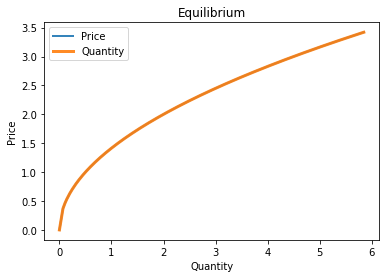

In [29]:
x_axis = np.linspace(0, 10, 800)
y_axis_price = price
y_axis_quantity = quantity

fig, ax = plt.subplots()

plt.plot(y_axis_quantity, y_axis_price, label="Price", alpha=0.9, linewidth=2)
plt.plot(y_axis_quantity, y_axis_price, label="Quantity", alpha=0.9, linewidth=3)

plt.title("Equilibrium")
plt.xlabel("Quantity")
plt.ylabel("Price")

plt.legend()

plt.show()

#in this case the 2 functions match beacuse they are the same !


(e) Let $p^*$ and $q^*$ be the equilibrium price and quantity, respectively. Define the consumer surplus as:\
$$ W^c = \int_{0}^{q} D^{-1}(z, y, \Phi_d) dz - p^*q^* $$

and the producer surplus as

$$W^s = p^* q^* - \int_{0}^{q^*} S^{-1}(z, \Phi_s) dz$$

where $D^{−1}$ and $S^{−1}$ are the inverse of the demand and supply function. Find
a numerical approximation of the total surplus in the market defined as 
$$S =W^{c} + W^{s} $$

In [30]:
from scipy.integrate import quad

In [42]:
q_star= demand(α,Y,price_equilibrium)
p_star = price_equilibrium

def integrand(q):
    return inv_demand(q,α,Y)


area_demand, error_c = quad(integrand,0.00001,q_star)
Wc=area_demand -q_star*p_star
print("The surplus of the consumer is: ", Wc)

def integrand2(q):
    return inv_supply(q,γ)


q_star_s = supply(γ,price_equilibrium)
area_supply, error_s = quad(integrand2,0.00001,q_star_s)
Ws=q_star_s*price_equilibrium-area_supply
print("The surplus of the producer is: ", Ws)

surplus=Wc+Ws

print ("The total surplus in the market is:", surplus)

The surplus of the consumer is:  509.64518398967084
The surplus of the producer is:  13.333324321486042
The total surplus in the market is: 522.9785083111569
